# **ASSIGNMENT 2**


## 1. Load the Dataset:


### Import the Gapminder dataset into a Pandas DataFrame:
(Also handled the missing values here in advance, while loading the data.)

In [1]:
import pandas as pd
import numpy as np


In [3]:
# Imported all three data, excel files as three different dataframes first. I also handled the missing values here, making sure
# they are imported as NaN, wheter they are represented by empty cells, or another string like NA, N/A, etc. in the original data.

data_pop = pd.read_csv('C:\\Users\\reyta\\Downloads\\python_advanced\\Datasets\\gapminder\\population.csv', na_values=['', 'NA', 'N/A', 'nan'])
data_life_exp = pd.read_csv('C:\\Users\\reyta\\Downloads\\python_advanced\\Datasets\\gapminder\\life_expectancy.csv', na_values=['', 'NA', 'N/A', 'nan'])
data_gdp = pd.read_csv('C:\\Users\\reyta\\Downloads\\python_advanced\\Datasets\\gapminder\\gdp_pcap.csv', na_values=['', 'NA', 'N/A', 'nan'])

data_pop
data_life_exp
data_gdp

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,599,599,599,599,599,599,599,599,599,...,4800,4910,5030,5150,5270,5390,5520,5650,5780,5920
1,Angola,465,466,469,471,472,475,477,479,481,...,24.8k,25.3k,25.9k,26.4k,26.9k,27.4k,28k,28.5k,29.1k,29.6k
2,Albania,585,587,588,590,592,593,595,597,598,...,54k,54.6k,55.2k,55.8k,56.4k,56.9k,57.5k,58.1k,58.7k,59.2k
3,Andorra,1710,1710,1710,1720,1720,1720,1730,1730,1730,...,79.3k,79.5k,79.8k,80.1k,80.4k,80.7k,81k,81.2k,81.5k,81.8k
4,UAE,1420,1430,1430,1440,1450,1450,1460,1460,1470,...,92.5k,92.6k,92.6k,92.7k,92.8k,92.9k,92.9k,93k,93.1k,93.1k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Samoa,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,24.5k,25k,25.5k,26k,26.5k,27k,27.6k,28.1k,28.6k,29.2k
191,Yemen,1260,1260,1270,1270,1270,1280,1280,1280,1290,...,6450,6600,6760,6930,7100,7270,7450,7630,7810,8000
192,South Africa,2180,2160,2130,2110,2090,1980,1980,2140,1880,...,44.7k,45.3k,45.9k,46.5k,47.2k,47.8k,48.4k,49k,49.6k,50.2k
193,Zambia,664,666,668,669,671,672,674,676,677,...,16k,16.3k,16.7k,17.1k,17.5k,17.9k,18.3k,18.7k,19.1k,19.6k


In [5]:
#I defined and used two functions here:

# 1. The values that are stored as strings like "3.5b" instead of zeros, must be converted to floats for following operations in the assignment.
# 2. Also, some values are stored as int, and they are also needs to be converted to float to make sure their compatibility with other tables that are going to be merged.

def convert_str_to_float(val):
    if isinstance(val, str):
        if 'M' in val:
            return float(val.replace('M', '')) * 1e6
        elif 'm' in val:
            return float(val.replace('m', '')) * 1e3
        elif 'k' in val:
            return float(val.replace('k', '')) * 1e3
        elif 'K' in val:
            return float(val.replace('K', '')) * 1e3
        elif 'B' in val:
            return float(val.replace('B', '')) * 1e9
        elif 'b' in val:
            return float(val.replace('b', '')) * 1e9
        else:
            return val
    return val
    
def convert_int_to_float(df):
    for columns in df.columns[1:]:
        df[columns] = df[columns].astype(float)
     return df    
    
# Apply the function
data_gdp.iloc[:, 1:] = data_gdp.iloc[:, 1:].map(convert_str_to_float)
data_pop.iloc[:, 1:] = data_pop.iloc[:, 1:].map(convert_str_to_float)
data_life_exp.iloc[:, 1:] = data_life_exp.iloc[:, 1:].map(convert_str_to_float)

convert_int_to_float(data_gdp)
convert_int_to_float(data_pop)

data_life_exp


,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,75.5,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.6,76.8
1,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.8,79.0,79.1,79.2,79.3,79.5,79.6,79.7,79.9,80.0
2,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.2,88.3,88.4
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,UAE,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,...,82.4,82.5,82.6,82.7,82.8,82.9,83.0,83.1,83.2,83.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Samoa,25.4,25.4,25.4,25.4,25.4,25.4,25.4,25.4,25.4,...,79.8,79.9,80.0,80.1,80.3,80.4,80.5,80.6,80.7,80.8
191,Yemen,23.4,23.4,23.4,23.4,23.4,23.4,23.4,23.4,23.4,...,76.9,77.0,77.1,77.3,77.4,77.5,77.6,77.8,77.9,78.0
192,South Africa,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,...,76.4,76.5,76.7,76.8,77.0,77.1,77.3,77.4,77.5,77.7
193,Zambia,32.6,32.6,32.6,32.6,32.6,32.6,32.6,32.6,32.6,...,75.8,76.0,76.1,76.3,76.4,76.5,76.7,76.8,77.0,77.1


## 2. Data Merging:

### Merge different parameters such as gdp, population, life expectancy, and so on.

In [9]:
# Add a new column called category for second index level I decided to apply to merged data.
data_pop["Category"] = "Population"
data_gdp["Category"] = "GDP"
data_life_exp["Category"] = "Life Expectancy"

# Merged the three data frames.
data = pd.concat([data_pop, data_gdp, data_life_exp])


# Set both 'Country' and 'Category' as indexes
data = data.set_index(["country", "Category"])

# I re-sorted it as follows because it was displayed acc. to the second index previosly, 
# which was unefficient to work with especially in exploration step.
data = data.sort_index()

# Rebuild DataFrame with pd.MultiIndex to avoid redundancy in Country display
index = pd.MultiIndex.from_product(
    [data.index.levels[0], data.index.levels[1]],
    names=["Country", "Category"]
)

# Reindex to ensure all combinations are included and fill missing data (if any)
data = data.reindex(index)

# Display the resulting DataFrame
data





C:\Users\reyta\AppData\Local\Temp\ipykernel_4208\3858248859.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_pop["Category"] = "Population"
C:\Users\reyta\AppData\Local\Temp\ipykernel_4208\3858248859.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_gdp["Category"] = "GDP"


1800       1801       1802       1803  \
Country     Category                                                      
Afghanistan GDP                  599.0      599.0      599.0      599.0   
            Life Expectancy       28.2       28.2       28.2       28.2   
            Population       3280000.0  3280000.0  3280000.0  3280000.0   
Albania     GDP                  585.0      587.0      588.0      590.0   
            Life Expectancy       35.4       35.4       35.4       35.4   
...                                ...        ...        ...        ...   
Zambia      Life Expectancy       32.6       32.6       32.6       32.6   
            Population        747000.0   758000.0   770000.0   782000.0   
Zimbabwe    GDP                 1200.0     1200.0     1200.0     1200.0   
            Life Expectancy       33.7       33.7       33.7       33.7   
            Population       1090000.0  1090000.0  1090000.0  1090000.0   

                                  1804       1805       1806       1807  \
Country     Category                                                      
Afghanistan GDP                  599.0      599.0      599.0      599.0   
            Life Expectancy       28.2       28.2       28.1       28.1   
            Population       3280000.0  3280000.0  3280000.0  3280000.0   
Albania     GDP                  592.0      593.0      595.0      597.0   
            Life Expectancy       35.4       35.4       35.4       35.4   
...                                ...        ...        ...        ...   
Zambia      Life Expectancy       32.6       32.6       32.6       32.6   
            Population        794000.0   806000.0   818000.0   831000.0   
Zimbabwe    GDP                 1210.0     1210.0     1210.0     1210.0   
            Life Expectancy       33.7       33.7       33.7       33.7   
            Population       1090000.0  1090000.0  1090000.0  1090000.0   

                                  1808       1809  ...         2091  \
Country     Category                               ...                
Afghanistan GDP                  599.0      599.0  ...       4800.0   
            Life Expectancy       28.1       28.1  ...         75.5   
            Population       3280000.0  3280000.0  ...  108000000.0   
Albania     GDP                  598.0      600.0  ...      54000.0   
            Life Expectancy       35.4       35.4  ...         87.4   
...                                ...        ...  ...          ...   
Zambia      Life Expectancy       32.6       32.6  ...         75.8   
            Population        843000.0   856000.0  ...   60300000.0   
Zimbabwe    GDP                 1210.0     1210.0  ...       9540.0   
            Life Expectancy       33.7       33.7  ...         73.3   
            Population       1090000.0  1090000.0  ...   35100000.0   

                                    2092         2093         2094  \
Country     Category                                                 
Afghanistan GDP                   4910.0       5030.0       5150.0   
            Life Expectancy         75.7         75.8         76.0   
            Population       108000000.0  109000000.0  109000000.0   
Albania     GDP                  54600.0      55200.0      55800.0   
            Life Expectancy         87.5         87.6         87.7   
...                                  ...          ...          ...   
Zambia      Life Expectancy         76.0         76.1         76.3   
            Population        60700000.0   61100000.0   61500000.0   
Zimbabwe    GDP                   9780.0      10000.0      10300.0   
            Life Expectancy         73.4         73.5         73.7   
            Population        35200000.0   35300000.0   35400000.0   

                                    2095         2096         2097  \
Country     Category                                                 
Afghanistan GDP                   5270.0       5390.0       5520.0   
            Life Expectancy         7

In [11]:
#I just wanted to have the final merged version of data in my local computer.
data.to_excel("C:\\Users\\reyta\\Downloads\\python_advanced\\try2.xlsx")

## 3. Data Cleaning and Preparation:


I also did other data cleaning operations like replacing values that come in different formats above in the first fection, before merging.


### Identify and handle missing values in the dataset. 
 (I already handled them uploading the data at the beggining)
### Rename columns if necessary to make them more descriptive (e.g., rename 'pop' to 'Population').
  ( I already gave the column names before merging at the beggining of above cell. )

## 4. Data Exploration

### Display the first and last 5 rows of the dataset.

In [18]:
# To display the first 5 row of the data
data.head(5)

1800       1801       1802       1803  \
Country     Category                                                      
Afghanistan GDP                  599.0      599.0      599.0      599.0   
            Life Expectancy       28.2       28.2       28.2       28.2   
            Population       3280000.0  3280000.0  3280000.0  3280000.0   
Albania     GDP                  585.0      587.0      588.0      590.0   
            Life Expectancy       35.4       35.4       35.4       35.4   

                                  1804       1805       1806       1807  \
Country     Category                                                      
Afghanistan GDP                  599.0      599.0      599.0      599.0   
            Life Expectancy       28.2       28.2       28.1       28.1   
            Population       3280000.0  3280000.0  3280000.0  3280000.0   
Albania     GDP                  592.0      593.0      595.0      597.0   
            Life Expectancy       35.4       35.4       35.4       35.4   

                                  1808       1809  ...         2091  \
Country     Category                               ...                
Afghanistan GDP                  599.0      599.0  ...       4800.0   
            Life Expectancy       28.1       28.1  ...         75.5   
            Population       3280000.0  3280000.0  ...  108000000.0   
Albania     GDP                  598.0      600.0  ...      54000.0   
            Life Expectancy       35.4       35.4  ...         87.4   

                                    2092         2093         2094  \
Country     Category                                                 
Afghanistan GDP                   4910.0       5030.0       5150.0   
            Life Expectancy         75.7         75.8         76.0   
            Population       108000000.0  109000000.0  109000000.0   
Albania     GDP                  54600.0      55200.0      55800.0   
            Life Expectancy         87.5         87.6         87.7   

                                    2095         2096         2097  \
Country     Category                                                 
Afghanistan GDP                   5270.0       5390.0       5520.0   
            Life Expectancy         76.1         76.2         76.4   
            Population       109000000.0  110000000.0  110000000.0   
Albania     GDP                  56400.0      56900.0      57500.0   
            Life Expectancy         87.8         87.9         88.0   

                                    2098         2099         2100  
Country     Category                                                
Afghanistan GDP                   5650.0       5780.0       5920.0  
            Life Expectancy         76.5         76.6         76.8  
            Population       110000000.0  111000000.0  111000000.0  
Albania     GDP                  58100.0      58700.0      59200.0  
            Life Expectancy         88.2         88.3         88.4  

[5 rows x 301 columns]

In [20]:
# To display the first 5 "countries" instead
data.head(5*3)

1800       1801       1802       1803  \
Country     Category                                                      
Afghanistan GDP                  599.0      599.0      599.0      599.0   
            Life Expectancy       28.2       28.2       28.2       28.2   
            Population       3280000.0  3280000.0  3280000.0  3280000.0   
Albania     GDP                  585.0      587.0      588.0      590.0   
            Life Expectancy       35.4       35.4       35.4       35.4   
            Population        400000.0   402000.0   404000.0   405000.0   
Algeria     GDP                  951.0      952.0      953.0      955.0   
            Life Expectancy       28.8       28.8       28.8       28.8   
            Population       2500000.0  2510000.0  2520000.0  2530000.0   
Andorra     GDP                 1710.0     1710.0     1710.0     1720.0   
            Life Expectancy        NaN        NaN        NaN        NaN   
            Population          2650.0     2650.0     2650.0     2650.0   
Angola      GDP                  465.0      466.0      469.0      471.0   
            Life Expectancy       27.0       27.0       27.0       27.0   
            Population       1570000.0  1570000.0  1570000.0  1570000.0   

                                  1804       1805       1806       1807  \
Country     Category                                                      
Afghanistan GDP                  599.0      599.0      599.0      599.0   
            Life Expectancy       28.2       28.2       28.1       28.1   
            Population       3280000.0  3280000.0  3280000.0  3280000.0   
Albania     GDP                  592.0      593.0      595.0      597.0   
            Life Expectancy       35.4       35.4       35.4       35.4   
            Population        407000.0   409000.0   411000.0   413000.0   
Algeria     GDP                  956.0      957.0      959.0      960.0   
            Life Expectancy       28.8       28.8       28.8       28.8   
            Population       2540000.0  2550000.0  2560000.0  2560000.0   
Andorra     GDP                 1720.0     1720.0     1730.0     1730.0   
            Life Expectancy        NaN        NaN        NaN        NaN   
            Population          2650.0     2650.0     2650.0     2650.0   
Angola      GDP                  472.0      475.0      477.0      479.0   
            Life Expectancy       27.0       27.0       27.0       27.0   
            Population       1570000.0  1570000.0  1570000.0  1570000.0   

                                  1808       1809  ...         2091  \
Country     Category                               ...                
Afghanistan GDP                  599.0      599.0  ...       4800.0   
            Life Expectancy       28.1       28.1  ...         75.5   
            Population       3280000.0  3280000.0  ...  108000000.0   
Albania     GDP                  598.0      600.0  ...      54000.0   
            Life Expectancy       35.4       35.4  ...         87.4   
            Population        414000.0   416000.0  ...    1350000.0   
Algeria     GDP                  961.0      963.0  ...      41300.0   
            Life Expectancy       28.8       28.8  ...         86.1   
            Population       2570000.0  2580000.0  ...   67800000.0   
Andorra     GDP                 1730.0     1740.0  ...      79300.0   
            Life Expectancy        NaN        NaN  ...          NaN   
            Population          2650.0     2650.0  ...      62500.0   
Angola      GDP                  481.0      483.0  ...      24800.0   
            Life Expectancy       27.0       27.0  ...         78.8   
            Population       1570000.0  1570000.0  ...  125000000.0   

                                    2092         2093         2094  \
Country     Category                                                 
Afghanistan GDP                   4910.0       5030.0       5150.0   
            Life Expectancy         75.7         75.8         76

In [22]:
# To display the last 5 countries 
data.tail(5*3)

1800       1801       1802       1803  \
Country   Category                                                      
Venezuela GDP                 1530.0     1520.0     1520.0     1510.0   
          Life Expectancy       32.2       32.2       32.2       32.2   
          Population       1000000.0   978000.0   957000.0   936000.0   
Vietnam   GDP                 1200.0     1200.0     1200.0     1200.0   
          Life Expectancy       32.0       32.0       32.0       32.0   
          Population       4000000.0  4100000.0  4200000.0  4310000.0   
Yemen     GDP                 1260.0     1260.0     1270.0     1270.0   
          Life Expectancy       23.4       23.4       23.4       23.4   
          Population       2590000.0  2590000.0  2590000.0  2590000.0   
Zambia    GDP                  664.0      666.0      668.0      669.0   
          Life Expectancy       32.6       32.6       32.6       32.6   
          Population        747000.0   758000.0   770000.0   782000.0   
Zimbabwe  GDP                 1200.0     1200.0     1200.0     1200.0   
          Life Expectancy       33.7       33.7       33.7       33.7   
          Population       1090000.0  1090000.0  1090000.0  1090000.0   

                                1804       1805       1806       1807  \
Country   Category                                                      
Venezuela GDP                 1500.0     1490.0     1480.0     1480.0   
          Life Expectancy       32.2       32.2       32.2       32.2   
          Population        916000.0   896000.0   876000.0   857000.0   
Vietnam   GDP                 1200.0     1200.0     1200.0     1200.0   
          Life Expectancy       32.0       32.0       32.0       32.0   
          Population       4410000.0  4530000.0  4640000.0  4750000.0   
Yemen     GDP                 1270.0     1280.0     1280.0     1280.0   
          Life Expectancy       23.4       23.4       23.4       23.4   
          Population       2590000.0  2590000.0  2590000.0  2590000.0   
Zambia    GDP                  671.0      672.0      674.0      676.0   
          Life Expectancy       32.6       32.6       32.6       32.6   
          Population        794000.0   806000.0   818000.0   831000.0   
Zimbabwe  GDP                 1210.0     1210.0     1210.0     1210.0   
          Life Expectancy       33.7       33.7       33.7       33.7   
          Population       1090000.0  1090000.0  1090000.0  1090000.0   

                                1808       1809  ...        2091        2092  \
Country   Category                               ...                           
Venezuela GDP                 1470.0     1460.0  ...     32400.0     33000.0   
          Life Expectancy       32.2       32.2  ...        86.2        86.3   
          Population        838000.0   820000.0  ...  36500000.0  36400000.0   
Vietnam   GDP                 1200.0     1200.0  ...     49800.0     50400.0   
          Life Expectancy       32.0       32.0  ...        84.0        84.2   
          Population       4870000.0  4990000.0  ...  94900000.0  94500000.0   
Yemen     GDP                 1290.0     1290.0  ...      6450.0      6600.0   
          Life Expectancy       23.4       23.4  ...        76.9        77.0   
          Population       2590000.0  2590000.0  ...  73200000.0  73300000.0   
Zambia    GDP                  677.0      679.0  ...     16000.0     16300.0   
          Life Expectancy       32.6       32.6  ...        75.8        76.0   
          Population        843000.0   856000.0  ...  60300000.0  60700000.0   
Zimbabwe  GDP                 1210.0     1210.0  ...      9540.0      9780.0   
          Life Expectancy       33.7       33.7  ...        73.3        73.4   
          Population       1090000.0  1090000.0  ...  35100000.0  35200000.0   

                                 2093        2094        2095        2096  \
Country   Category                                                          
Venezuela GDP                 335

### Identify the number of unique countries represented in the dataset.

In [25]:
#To learn the number of unique countries represented in the dataset. It gives me not only that there ae 197 distinct countries represented
#in the data in general, but also that how many of them are represented in each category or in other words how many non-missing/valid values 
#for each category.
data.groupby('Category').count()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
Category,,,,,,,,,,,,,,,,,,,,,
GDP,195,195,195,195,195,195,195,195,195,195,...,195,195,195,195,195,195,195,195,195,195
Life Expectancy,186,186,186,186,186,186,186,186,186,186,...,186,186,186,186,186,186,186,186,186,186
Population,197,197,197,197,197,197,197,197,197,197,...,196,196,196,196,196,196,196,196,196,196


## Extract data for a specific year (e.g., 2000) and create a new DataFrame.

In [28]:
#I extract the data for the year I want
data_2100_series = data['2100']

#I convert it from pandas serier to df
data_2100_df = pd.DataFrame({'2100': data_2100_series})

data_2100_df

2100
Country     Category                    
Afghanistan GDP                   5920.0
            Life Expectancy         76.8
            Population       111000000.0
Albania     GDP                  59200.0
            Life Expectancy         88.4
...                                  ...
Zambia      Life Expectancy         77.1
            Population        63600000.0
Zimbabwe    GDP                  11900.0
            Life Expectancy         74.4
            Population        35600000.0

[591 rows x 1 columns]

## 6. Data Filtering

## Select all data related to a continent of your choice (e.g., Africa).

In [114]:
european_countries = [
    "Albania", "Andorra", "Armenia", "Austria", "Azerbaijan", "Belarus", "Belgium", 
    "Bosnia and Herzegovina", "Bulgaria", "Croatia", "Cyprus", "Czech Republic", "Denmark", 
    "Estonia", "Finland", "France", "Georgia", "Germany", "Greece", "Hungary", "Iceland", 
    "Ireland", "Italy", "Kazakhstan", "Kosovo", "Latvia", "Liechtenstein", "Lithuania", 
    "Luxembourg", "Malta", "Moldova", "Monaco", "Montenegro", "Netherlands", "North Macedonia", 
    "Norway", "Poland", "Portugal", "Romania", "Russia", "San Marino", "Serbia", "Slovakia", 
    "Slovenia", "Spain", "Sweden", "Switzerland", "Turkey", "Ukraine", "United Kingdom", "Vatican City"
]
filtered_data = pd.DataFrame()

# Loop through each country in the data's index, check if country is in the list above and get/concat data accordingly.
for country in data.index.get_level_values(level = 0):
    if country in european_countries:
        filtered_row = data.loc[country]
        filtered_data = pd.concat([filtered_data, pd.DataFrame(filtered_row)])



filtered_data


,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
Category,,,,,,,,,,,,,,,,,,,,,
GDP,585.0,587.0,588.0,590.0,592.0,593.0,595.0,597.0,598.0,600.0,...,54000.0,54600.0,55200.0,55800.0,56400.0,56900.0,57500.0,58100.0,58700.0,59200.0
Life Expectancy,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.2,88.3,88.4
Population,400000.0,402000.0,404000.0,405000.0,407000.0,409000.0,411000.0,413000.0,414000.0,416000.0,...,1350000.0,1320000.0,1290000.0,1260000.0,1230000.0,1210000.0,1180000.0,1150000.0,1120000.0,1100000.0
GDP,585.0,587.0,588.0,590.0,592.0,593.0,595.0,597.0,598.0,600.0,...,54000.0,54600.0,55200.0,55800.0,56400.0,56900.0,57500.0,58100.0,58700.0,59200.0
Life Expectancy,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.2,88.3,88.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Life Expectancy,36.6,36.6,36.6,36.6,36.6,36.6,36.6,36.6,36.6,36.6,...,84.0,84.2,84.3,84.4,84.5,84.7,84.8,84.9,85.0,85.1
Population,11200000.0,11200000.0,11200000.0,11200000.0,11200000.0,11200000.0,11200000.0,11200000.0,11200000.0,11200000.0,...,22000000.0,21900000.0,21700000.0,21500000.0,21300000.0,21100000.0,21000000.0,20800000.0,20600000.0,20400000.0
GDP,1090.0,1090.0,1090.0,1100.0,1100.0,1100.0,1110.0,1110.0,1110.0,1120.0,...,35100.0,35800.0,36500.0,37100.0,37800.0,38500.0,39200.0,39900.0,40600.0,41300.0


## Filter out countries with a population less than 1 million.

In [126]:
# Filtering the countries that has a population higher than 1 million
high_population_countries = data.loc[(data.index.get_level_values('Category') == 'Population') & (data['2024'] > 1000000)]

high_population_countries

,,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
Country,Category,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Population,3280000.0,3280000.0,3280000.0,3280000.0,3280000.0,3280000.0,3280000.0,3280000.0,3280000.0,3280000.0,...,108000000.0,108000000.0,109000000.0,109000000.0,109000000.0,110000000.0,110000000.0,110000000.0,111000000.0,111000000.0
Albania,Population,400000.0,402000.0,404000.0,405000.0,407000.0,409000.0,411000.0,413000.0,414000.0,416000.0,...,1350000.0,1320000.0,1290000.0,1260000.0,1230000.0,1210000.0,1180000.0,1150000.0,1120000.0,1100000.0
Algeria,Population,2500000.0,2510000.0,2520000.0,2530000.0,2540000.0,2550000.0,2560000.0,2560000.0,2570000.0,2580000.0,...,67800000.0,67900000.0,67900000.0,67900000.0,67900000.0,67900000.0,67900000.0,67900000.0,67800000.0,67800000.0
Angola,Population,1570000.0,1570000.0,1570000.0,1570000.0,1570000.0,1570000.0,1570000.0,1570000.0,1570000.0,1570000.0,...,125000000.0,126000000.0,127000000.0,128000000.0,129000000.0,130000000.0,131000000.0,131000000.0,132000000.0,133000000.0
Argentina,Population,534000.0,520000.0,506000.0,492000.0,479000.0,466000.0,453000.0,441000.0,429000.0,417000.0,...,49300000.0,49100000.0,48900000.0,48700000.0,48500000.0,48300000.0,48200000.0,48000000.0,47800000.0,47600000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,Population,1000000.0,978000.0,957000.0,936000.0,916000.0,896000.0,876000.0,857000.0,838000.0,820000.0,...,36500000.0,36400000.0,36300000.0,36200000.0,36000000.0,35900000.0,35800000.0,35600000.0,35500000.0,35400000.0
Vietnam,Population,4000000.0,4100000.0,4200000.0,4310000.0,4410000.0,4530000.0,4640000.0,4750000.0,4870000.0,4990000.0,...,94900000.0,94500000.0,94000000.0,93600000.0,93200000.0,92800000.0,92300000.0,91900000.0,91500000.0,91000000.0
Yemen,Population,2590000.0,2590000.0,2590000.0,2590000.0,2590000.0,2590000.0,2590000.0,2590000.0,2590000.0,2590000.0,...,73200000.0,73300000.0,73500000.0,73600000.0,73700000.0,73800000.0,73900000.0,74000000.0,74100000.0,74200000.0


## 6. Data Organisaiton

### Sort the dataset based on life expectancy in ascending order.

In [147]:
# Filter the rows with the category of 'Life Expectancy'
life_expectancy_data = data[data.index.get_level_values('Category') == 'Life Expectancy']

# Calculate the mean of life expectancy  for each country 
mean_life_expectancy = life_expectancy_data.mean(axis=1)

# Sort the countries based on the mean 
sorted_countries = mean_life_expectancy.sort_values(ascending=False).index.get_level_values('Country')

#Keep country information intact
sorted_data = data.loc[sorted_countries]

sorted_data

1800    1801    1802    1803    1804    1805  \
Country       Category                                                          
Andorra       GDP              1710.0  1710.0  1710.0  1720.0  1720.0  1720.0   
              Life Expectancy     NaN     NaN     NaN     NaN     NaN     NaN   
              Population       2650.0  2650.0  2650.0  2650.0  2650.0  2650.0   
San Marino    GDP              2000.0  2000.0  2010.0  2010.0  2010.0  2020.0   
              Life Expectancy     NaN     NaN     NaN     NaN     NaN     NaN   
...                               ...     ...     ...     ...     ...     ...   
Holy See      Life Expectancy     NaN     NaN     NaN     NaN     NaN     NaN   
              Population        905.0   905.0   905.0   905.0   905.0   905.0   
Liechtenstein GDP                 NaN     NaN     NaN     NaN     NaN     NaN   
              Life Expectancy     NaN     NaN     NaN     NaN     NaN     NaN   
              Population       5800.0  5800.0  5800.0  5800.0  5800.0  5800.0   

                                 1806    1807    1808    1809  ...     2091  \
Country       Category                                         ...            
Andorra       GDP              1730.0  1730.0  1730.0  1740.0  ...  79300.0   
              Life Expectancy     NaN     NaN     NaN     NaN  ...      NaN   
              Population       2650.0  2650.0  2650.0  2650.0  ...  62500.0   
San Marino    GDP              2020.0  2020.0  2030.0  2030.0  ...  86200.0   
              Life Expectancy     NaN     NaN     NaN     NaN  ...      NaN   
...                               ...     ...     ...     ...  ...      ...   
Holy See      Life Expectancy     NaN     NaN     NaN     NaN  ...      NaN   
              Population        905.0   905.0   905.0   905.0  ...      NaN   
Liechtenstein GDP                 NaN     NaN     NaN     NaN  ...      NaN   
              Life Expectancy     NaN     NaN     NaN     NaN  ...      NaN   
              Population       5800.0  5800.0  5800.0  5800.0  ...  41400.0   

                                  2092     2093     2094     2095     2096  \
Country       Category                                                       
Andorra       GDP              79500.0  79800.0  80100.0  80400.0  80700.0   
              Life Expectancy      NaN      NaN      NaN      NaN      NaN   
              Population       62200.0  61900.0  61700.0  61400.0  61200.0   
San Marino    GDP              86400.0  86600.0  86700.0  86900.0  87000.0   
              Life Expectancy      NaN      NaN      NaN      NaN      NaN   
...                                ...      ...      ...      ...      ...   
Holy See      Life Expectancy      NaN      NaN      NaN      NaN      NaN   
              Population           NaN      NaN      NaN      NaN      NaN   
Liechtenstein GDP                  NaN      NaN      NaN      NaN      NaN   
              Life Expectancy      NaN      NaN      NaN      NaN      NaN   
              Population       41400.0  41400.0  41400.0  41400.0  41400.0   

                                  2097     2098     2099     2100  
Country       Category                                             
Andorra       GDP              81000.0  81200.0  81500.0  81800.0  
              Life Expectancy      NaN      NaN      NaN      NaN  
              Population       60900.0  60700.0  60500.0  60200.0  
San Marino    GDP              87200.0  87300.0  87500.0  87600.0  
              Life Expectancy      NaN      NaN      NaN      NaN  
...                                ...      ...      ...      ...  
Holy See      Life Expectancy      NaN      NaN      NaN      NaN  
              Population           NaN      NaN      NaN      NaN  
Liechtenstein GDP                  NaN      NaN      NaN      NaN  
              Life Expectancy      NaN      NaN      NaN      NaN  
              Population       41400.0  41500.0  41500.0  41500.0  

[591 rows x 301 columns]

### Create a new column that categorizes countries into 'High', 'Medium', or 'Low' population based on defined thresholds.

In [263]:
#First I create a copy to make sure my original df wont be lost. 
temp = data_pop.copy()
#Insert a new column to fill with corresponding population category. 
temp.insert(0, 'Population_Group', np.nan)

#Fill that column based on the values in population column.
for index, pop in temp['2024'].items():
    if pop < 1000000:
        temp.loc[index, 'Population_Group'] = 'Minimum'
    elif pop > 1000000 and pop < 100000000:
        temp.loc[index, 'Population_Group'] = 'Medium'
    else:
        temp.loc[index, 'Population_Group'] = 'Maximum'
temp

1440000000.0 11500.0 9285000.0


C:\Users\reyta\AppData\Local\Temp\ipykernel_4208\3402614865.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Medium' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  temp.loc[index, 'Population_Group'] = 'Medium'


,Population_Group,country,1800,1801,1802,1803,1804,1805,1806,1807,...,2092,2093,2094,2095,2096,2097,2098,2099,2100,Category
0,Medium,Afghanistan,3280000.0,3280000.0,3280000.0,3280000.0,3280000.0,3280000.0,3280000.0,3280000.0,...,108000000.0,109000000.0,109000000.0,109000000.0,110000000.0,110000000.0,110000000.0,111000000.0,111000000.0,Population
1,Medium,Angola,1570000.0,1570000.0,1570000.0,1570000.0,1570000.0,1570000.0,1570000.0,1570000.0,...,126000000.0,127000000.0,128000000.0,129000000.0,130000000.0,131000000.0,131000000.0,132000000.0,133000000.0,Population
2,Medium,Albania,400000.0,402000.0,404000.0,405000.0,407000.0,409000.0,411000.0,413000.0,...,1320000.0,1290000.0,1260000.0,1230000.0,1210000.0,1180000.0,1150000.0,1120000.0,1100000.0,Population
3,Minimum,Andorra,2650.0,2650.0,2650.0,2650.0,2650.0,2650.0,2650.0,2650.0,...,62200.0,61900.0,61700.0,61400.0,61200.0,60900.0,60700.0,60500.0,60200.0,Population
4,Medium,UAE,40200.0,40200.0,40200.0,40200.0,40200.0,40200.0,40200.0,40200.0,...,13500000.0,13600000.0,13700000.0,13800000.0,13800000.0,13900000.0,14000000.0,14000000.0,14100000.0,Population
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,Minimum,Samoa,47300.0,47300.0,47300.0,47300.0,47300.0,47300.0,47300.0,47200.0,...,434000.0,435000.0,436000.0,437000.0,438000.0,439000.0,440000.0,441000.0,441000.0,Population
193,Medium,Yemen,2590000.0,2590000.0,2590000.0,2590000.0,2590000.0,2590000.0,2590000.0,2590000.0,...,73300000.0,73500000.0,73600000.0,73700000.0,73800000.0,73900000.0,74000000.0,74100000.0,74200000.0,Population
194,Medium,South Africa,1450000.0,1450000.0,1460000.0,1460000.0,1470000.0,1470000.0,1480000.0,1490000.0,...,75500000.0,75400000.0,75300000.0,75200000.0,75100000.0,75000000.0,74800000.0,74700000.0,74600000.0,Population
195,Medium,Zambia,747000.0,758000.0,770000.0,782000.0,794000.0,806000.0,818000.0,831000.0,...,60700000.0,61100000.0,61500000.0,61900000.0,62200000.0,62600000.0,62900000.0,63300000.0,63600000.0,Population


## 7. Basic Data Analysis

### Calculate the average GDP per capita for each continent.

In [338]:
#First, I asked gpt to give me the country names for each continent as proper lists as below.
africa = [
    'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde',
    'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo', 'Democratic Republic of the Congo',
    'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia',
    'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar',
    'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria',
    'Rwanda', 'São Tomé and Príncipe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa',
    'South Sudan', 'Sudan', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'
]
asia = [
    'Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia',
    'China', 'Cyprus', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan',
    'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar',
    'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Russia', 'Saudi Arabia',
    'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Taiwan', 'Tajikistan', 'Thailand', 'Timor-Leste',
    'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen'
]

europe = [
    'Albania', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia and Herzegovina',
    'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia',
    'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kazakhstan', 'Kosovo', 'Latvia', 'Liechtenstein',
    'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway',
    'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden',
    'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom', 'Vatican City'
]
north_america = [
    'Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic',
    'El Salvador', 'Grenada', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Saint Kitts and Nevis',
    'Saint Lucia', 'Saint Vincent and the Grenadines', 'Trinidad and Tobago', 'United States'
]
south_america = [
    'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela'
]
oceania = [
    'Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea',
    'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu'
]

#Then I prefered to copy my df to a another object, to keep my original one safe.
temp = data_gdp.copy()
#I inserted a new column to fill with continent information for each country/row.
temp.insert(0, 'Continent', np.nan)
#Here I fill the column checkin countries based on the lsits above.
for index, country in temp['country'].items():
    if country in africa:
        temp.loc[index, 'Continent'] = 'Africa'
    elif country in asia:
        temp.loc[index, 'Continent'] = 'Asia'
    elif country in europe:
        temp.loc[index, 'Continent'] = 'Europe'
    elif country in north_america:
        temp.loc[index, 'Continent'] = 'North America'
    elif country in south_america:
        temp.loc[index, 'Continent'] = 'South America'
    else:
        temp.loc[index, 'Continent'] = 'Oceania'

#And below, I group my df by continent and then calculate and report the mean.
temp.groupby('Continent')['2024'].mean()

C:\Users\reyta\AppData\Local\Temp\ipykernel_4208\2505987814.py:48: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Asia' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  temp.loc[index, 'Continent'] = 'Asia'


Continent
Africa            6131.979167
Asia             24022.978723
Europe           49133.076923
North America    17925.263158
Oceania          18716.000000
South America    18793.333333
Name: 2024, dtype: float64

### Identify the country with the highest life expectancy in a given year.

In [336]:
for index, country in data_life_exp['country'].items():
    if data_life_exp.loc[index, '2024'] == data_life_exp['2024'].max():
        print(country)


Singapore


## Data Visualisaiton

### Use basic plotting functions in Pandas (e.g., plot, bar) to visualize the trends in life expectancy over the years for a selected country.

In [322]:
data_life_exp

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2092,2093,2094,2095,2096,2097,2098,2099,2100,Category
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.6,76.8,Life Expectancy
1,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,79.0,79.1,79.2,79.3,79.5,79.6,79.7,79.9,80.0,Life Expectancy
2,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.5,87.6,87.7,87.8,87.9,88.0,88.2,88.3,88.4,Life Expectancy
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Life Expectancy
4,UAE,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,...,82.5,82.6,82.7,82.8,82.9,83.0,83.1,83.2,83.3,Life Expectancy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Samoa,25.4,25.4,25.4,25.4,25.4,25.4,25.4,25.4,25.4,...,79.9,80.0,80.1,80.3,80.4,80.5,80.6,80.7,80.8,Life Expectancy
191,Yemen,23.4,23.4,23.4,23.4,23.4,23.4,23.4,23.4,23.4,...,77.0,77.1,77.3,77.4,77.5,77.6,77.8,77.9,78.0,Life Expectancy
192,South Africa,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,...,76.5,76.7,76.8,77.0,77.1,77.3,77.4,77.5,77.7,Life Expectancy
193,Zambia,32.6,32.6,32.6,32.6,32.6,32.6,32.6,32.6,32.6,...,76.0,76.1,76.3,76.4,76.5,76.7,76.8,77.0,77.1,Life Expectancy


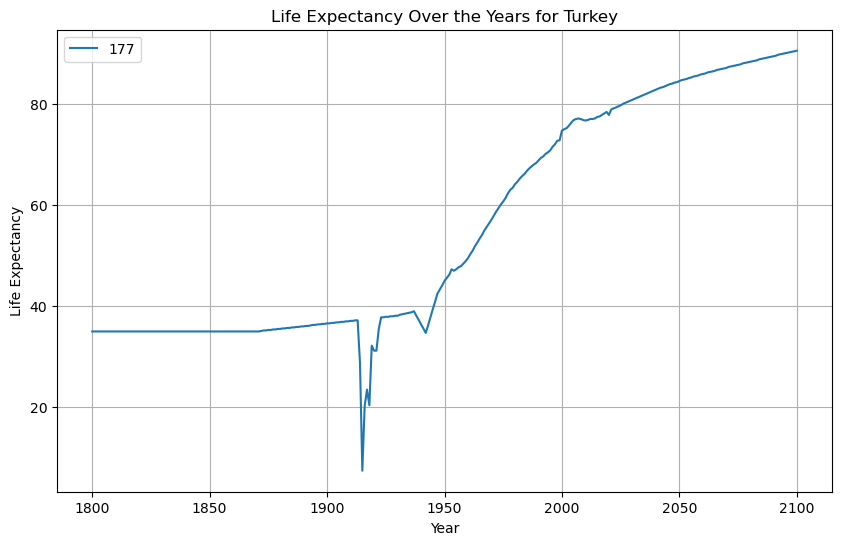

In [334]:
import matplotlib.pyplot as plt

country = 'Turkey' 

# I get the data for only the country that I want.Dropping unnecessary columns. And transpose to work it with plot.
country_data = data_life_exp[data_life_exp['country'] == country].drop(['country', 'Category'], axis=1).transpose()

# Plotting the life expectancy trend for the selected country
country_data.plot(kind='line', figsize=(10, 6), title=f"Life Expectancy Over the Years for {country}")
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.show()